## 0. Veri Setinin Hazırlanması

In [250]:
# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns


In [251]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/house-prices-2023-dataset/House_Price_dataset.csv")
df = df_.copy()

In [252]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Veriye İlk Bakış

In [253]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161.0,340.0,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,NaN,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645.0,3226.0,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


veri setimizdeki satır ve sütun sayısını .shape ile görebiliriz

In [254]:
df.shape

(168446, 20)

In [255]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['property_id', 'location_id', 'page_url', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Area Type', 'Area Size', 'Area Category'] 

Veri seti içerisinde toplam 20 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [256]:
# Veri setinin sütun bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    163493 non-null  float64
 1   location_id    163549 non-null  float64
 2   page_url       163417 non-null  object 
 3   property_type  163456 non-null  object 
 4   price          163339 non-null  float64
 5   location       163459 non-null  object 
 6   city           163525 non-null  object 
 7   province_name  163444 non-null  object 
 8   latitude       163388 non-null  float64
 9   longitude      163559 non-null  float64
 10  baths          163509 non-null  float64
 11  area           163617 non-null  object 
 12  purpose        163451 non-null  object 
 13  bedrooms       163409 non-null  float64
 14  date_added     163514 non-null  object 
 15  agency         120601 non-null  object 
 16  agent          120686 non-null  object 
 17  Area Type      163512 non-nul

In [257]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [258]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [259]:
#objectleri category'e çevirdikten sonra kontrol etmek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   property_id    163493 non-null  float64 
 1   location_id    163549 non-null  float64 
 2   page_url       163417 non-null  category
 3   property_type  163456 non-null  category
 4   price          163339 non-null  float64 
 5   location       163459 non-null  category
 6   city           163525 non-null  category
 7   province_name  163444 non-null  category
 8   latitude       163388 non-null  float64 
 9   longitude      163559 non-null  float64 
 10  baths          163509 non-null  float64 
 11  area           163617 non-null  category
 12  purpose        163451 non-null  category
 13  bedrooms       163409 non-null  float64 
 14  date_added     163514 non-null  category
 15  agency         120601 non-null  category
 16  agent          120686 non-null  category
 17  Area Type 

In [260]:
# Veri setindeki numarical veriler için istatistiksel özet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,163493.0,1.559695e+07,2.251128e+06,86575.000000,1.488404e+07,1.666004e+07,1.708684e+07,1.735772e+07
location_id,163549.0,4.378391e+03,3.776767e+03,1.000000,1.058000e+03,3.291000e+03,7.220000e+03,1.422000e+04
price,163339.0,1.776443e+07,3.487839e+07,0.000000,1.750000e+05,8.500000e+06,1.950000e+07,1.450000e+09
latitude,163388.0,2.986180e+01,3.807774e+00,11.052446,2.494894e+01,3.146019e+01,3.356089e+01,7.318409e+01
longitude,163559.0,7.124184e+01,3.132698e+00,25.906027,6.713036e+01,7.305618e+01,7.326611e+01,8.016143e+01
baths,163509.0,2.873719e+00,2.470112e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,163409.0,3.179537e+00,1.971420e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
Area Size,163411.0,5.888307e+00,5.759333e+00,0.000000,3.000000e+00,5.000000e+00,8.000000e+00,8.000000e+02


## 2. Eksik Veri Analizi

### 2.1 Eksik Verilerin Gözlemlenmesi

In [261]:
# Eksik verilerin her bir sütunda sayısı
df.isna().sum()

property_id       4953
location_id       4897
page_url          5029
property_type     4990
price             5107
location          4987
city              4921
province_name     5002
latitude          5058
longitude         4887
baths             4937
area              4829
purpose           4995
bedrooms          5037
date_added        4932
agency           47845
agent            47760
Area Type         4934
Area Size         5035
Area Category     4910
dtype: int64

In [262]:
df.isna().sum().sum()

185045

In [263]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161.0,340.0,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,NaN,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
5,850762.0,3390.0,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000.0,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8.0,1.6 Kanal,For Sale,8.0,04-05-2019,NaN,NaN,Kanal,1.6,1-5 Kanal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168439,17355068.0,10061.0,https://www.zameen.com/Property/bahria_town_ka...,House,14000000.0,Bahria Town Karachi,Karachi,Sindh,25.005740,67.316385,4.0,14 Marla,For Sale,4.0,07-18-2019,AAban Real Estate & Builders,NaN,Marla,14.0,10-15 Marla
168440,17355247.0,6760.0,https://www.zameen.com/Property/gulshan_e_maym...,Flat,4800000.0,Gadap Town,Karachi,Sindh,25.022481,67.129082,0.0,3.8 Marla,For Sale,2.0,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,NaN,0-5 Marla
168443,NaN,6757.0,https://www.zameen.com/Property/gulshan_e_maym...,NaN,27000000.0,Gadap Town,Karachi,Sindh,25.015384,67.116330,0.0,9.6 Marla,For Sale,6.0,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251.0,6752.0,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000.0,Gadap Town,Karachi,Sindh,25.013265,67.120818,0.0,7.8 Marla,For Sale,3.0,07-18-2019,Al Shahab Enterprises,Shahmir,NaN,7.8,5-10 Marla


In [264]:
# Eksik verilerin yüzdesi
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

property_id       2.940408
location_id       2.907163
page_url          2.985527
property_type     2.962374
price             3.031832
location          2.960593
city              2.921411
province_name     2.969498
latitude          3.002743
longitude         2.901227
baths             2.930910
area              2.866794
purpose           2.965342
bedrooms          2.990276
date_added        2.927941
agency           28.403761
agent            28.353300
Area Type         2.929129
Area Size         2.989088
Area Category     2.914881
dtype: float64

In [265]:
# Eksik veri oranı yüksek sütunlar (örneğin %50'den fazla eksik olanlar)
high_missing = missing_percentage[missing_percentage > 50]
high_missing

Series([], dtype: float64)

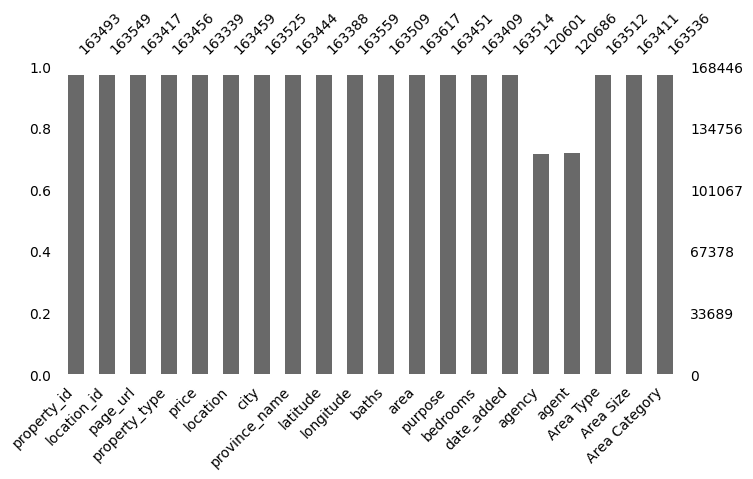

In [266]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

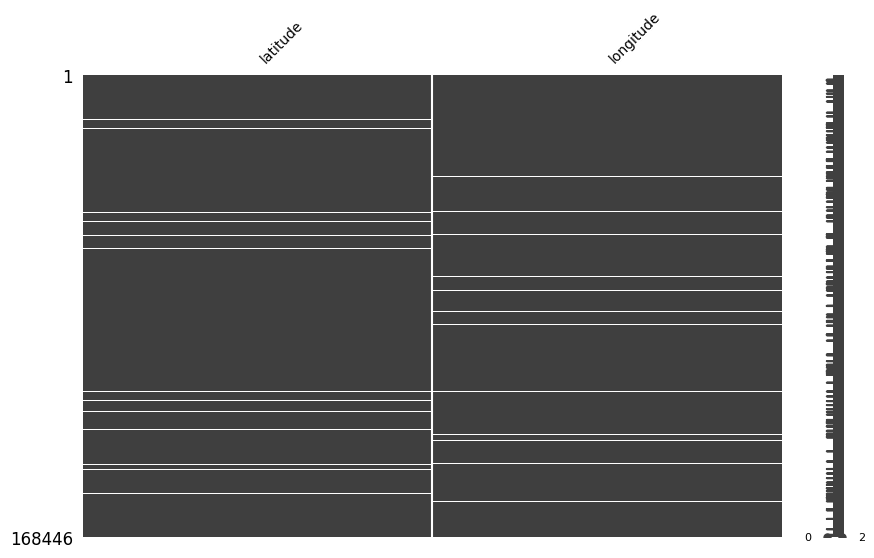

In [267]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['latitude', 'longitude']],
            figsize = (10, 6),
            fontsize = 10);

In [268]:
# Bozuk veri tespiti (örneğin, 'latitude' veya 'longitude' gibi sütunlardaki saçma değerler)
print("Latitude min-max:", df['latitude'].min(), "-", df['latitude'].max())
print("Longitude min-max:", df['longitude'].min(), "-", df['longitude'].max())

Latitude min-max: 11.052446 - 73.184088
Longitude min-max: 25.906027 - 80.16143000000001


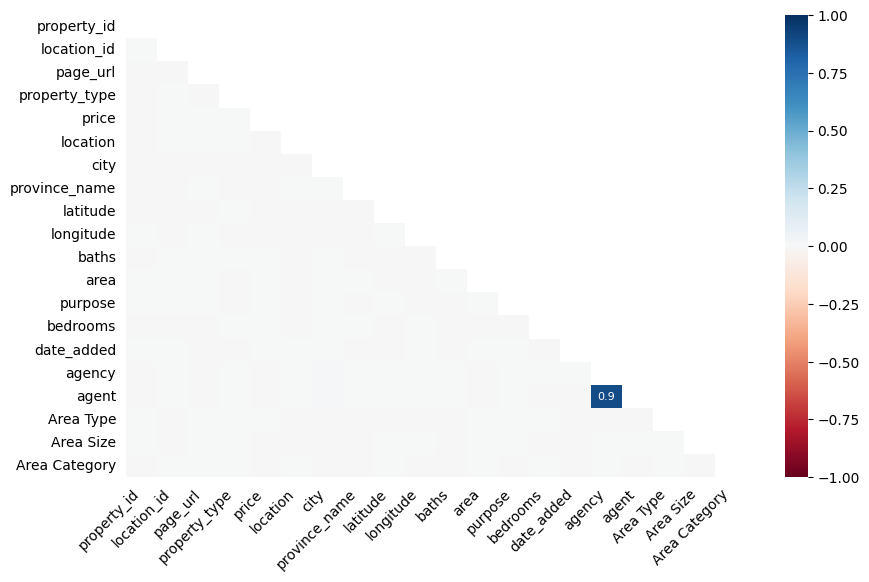

In [269]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

### 2.2 Eksik ve Bozuk Verilerin Temizlenmesi

In [270]:
# 'agency' ve 'agent' sütunlarını mod (en sık görülen değer) ile doldur
df['agency'] = df['agency'].fillna(df['agency'].mode()[0])
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [271]:
# Tekrar eksik verilerin yüzdesi gözlemlenir
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

property_id      2.940408
location_id      2.907163
page_url         2.985527
property_type    2.962374
price            3.031832
location         2.960593
city             2.921411
province_name    2.969498
latitude         3.002743
longitude        2.901227
baths            2.930910
area             2.866794
purpose          2.965342
bedrooms         2.990276
date_added       2.927941
agency           0.000000
agent            0.000000
Area Type        2.929129
Area Size        2.989088
Area Category    2.914881
dtype: float64

In [272]:
# ya da direkt 'agency' ve 'agent' sütunlarını veri setinden sil
df = df.drop(columns=['agency', 'agent'])

In [273]:
# Latitude ve longitude eksik değerleri sil
df = df.drop(columns=['latitude', 'longitude'])


### 2.3 Eksik Verilerin Doldurulması

In [274]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturulması.
df_fillna = df.copy()

df_fillna.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,2.0,4 Marla,For Sale,2.0,02-04-2019,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,3.0,5.6 Marla,NaN,3.0,05-04-2019,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,6.0,8 Marla,For Sale,5.0,07-17-2019,Marla,8.0,5-10 Marla


#### 2.3.1 Sayısal Değişkenlerin Doldurulması

In [275]:
numerical_features

['property_id',
 'location_id',
 'price',
 'latitude',
 'longitude',
 'baths',
 'bedrooms',
 'Area Size']

In [276]:
numerical_features.remove("latitude")
numerical_features.remove("longitude")

In [277]:
#nümerik verilerin ortalama ile doldurulması

to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col] = df_fillna[col].fillna(df[col].median())

In [278]:
df_fillna.isna().sum()

property_id      4953
location_id         0
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
baths               0
area             4829
purpose          4995
bedrooms            0
date_added       4932
Area Type        4934
Area Size           0
Area Category    4910
dtype: int64

In [279]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,163493.0,1.559695e+07,2.251128e+06,86575.0,14884038.0,16660036.0,17086843.0,1.735772e+07
location_id,163549.0,4.378391e+03,3.776767e+03,1.0,1058.0,3291.0,7220.0,1.422000e+04
price,163339.0,1.776443e+07,3.487839e+07,0.0,175000.0,8500000.0,19500000.0,1.450000e+09
baths,163509.0,2.873719e+00,2.470112e+00,0.0,0.0,3.0,4.0,4.030000e+02
bedrooms,163409.0,3.179537e+00,1.971420e+00,0.0,2.0,3.0,4.0,6.800000e+01
Area Size,163411.0,5.888307e+00,5.759333e+00,0.0,3.0,5.0,8.0,8.000000e+02


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


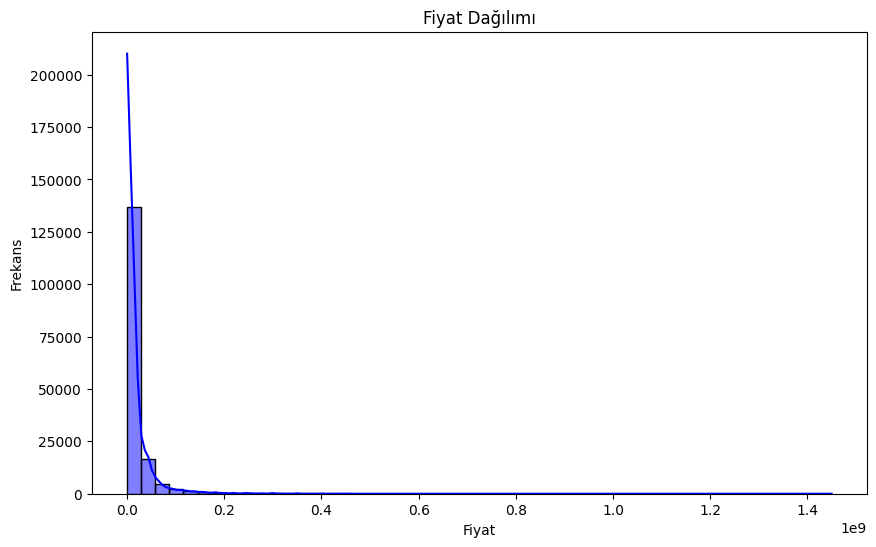

In [280]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()


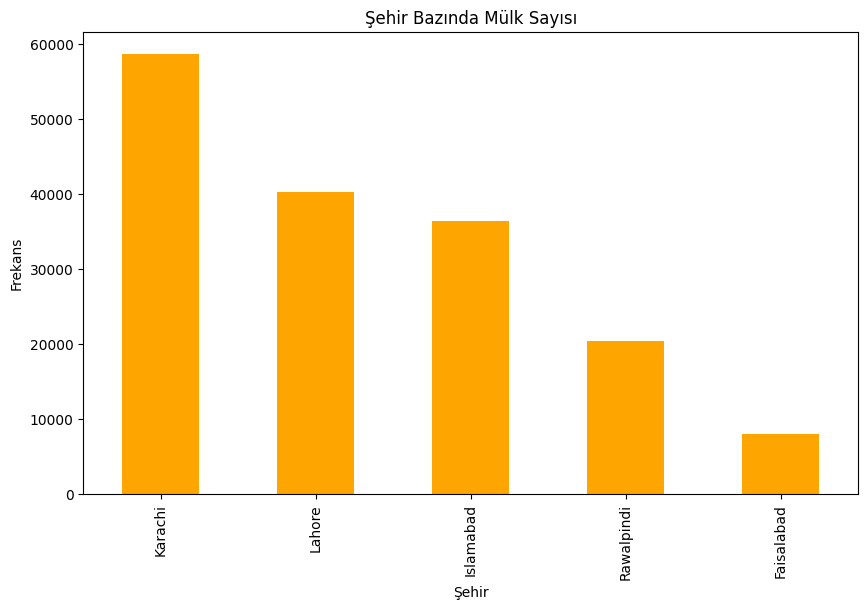

In [281]:
plt.figure(figsize=(10, 6))
df['city'].value_counts().plot(kind='bar', color='orange')
plt.title('Şehir Bazında Mülk Sayısı')
plt.xlabel('Şehir')
plt.ylabel('Frekans')
plt.show()


#### 2.3.2 Kategorik Değişkenlerin Doldurulması

In [282]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   property_id    163493 non-null  float64 
 1   location_id    168446 non-null  float64 
 2   page_url       163417 non-null  category
 3   property_type  163456 non-null  category
 4   price          168446 non-null  float64 
 5   location       163459 non-null  category
 6   city           163525 non-null  category
 7   province_name  163444 non-null  category
 8   baths          168446 non-null  float64 
 9   area           163617 non-null  category
 10  purpose        163451 non-null  category
 11  bedrooms       168446 non-null  float64 
 12  date_added     163514 non-null  category
 13  Area Type      163512 non-null  category
 14  Area Size      168446 non-null  float64 
 15  Area Category  163536 non-null  category
dtypes: category(10), float64(6)
memory usage: 15.5 MB


In [283]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# property_type değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['property_type'].isna().sum()

# property_type değişkeninde en çok tekrar eden değeri(mode) alalım.
property_type_mod = df_fillna['property_type'].mode()

# property_type değişkenini mode değeri ile dolduralım.
df_fillna['property_type'] = df_fillna['property_type'].fillna(value = property_type_mod[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

property_id      4953
location_id         0
page_url         5029
property_type       0
price               0
location         4987
city             4921
province_name    5002
baths               0
area             4829
purpose          4995
bedrooms            0
date_added       4932
Area Type        4934
Area Size           0
Area Category    4910
dtype: int64

In [284]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   property_id    163493 non-null  float64 
 1   location_id    168446 non-null  float64 
 2   page_url       163417 non-null  category
 3   property_type  168446 non-null  category
 4   price          168446 non-null  float64 
 5   location       163459 non-null  category
 6   city           163525 non-null  category
 7   province_name  163444 non-null  category
 8   baths          168446 non-null  float64 
 9   area           163617 non-null  category
 10  purpose        163451 non-null  category
 11  bedrooms       168446 non-null  float64 
 12  date_added     163514 non-null  category
 13  Area Type      163512 non-null  category
 14  Area Size      168446 non-null  float64 
 15  Area Category  163536 non-null  category
dtypes: category(10), float64(6)
memory usage: 15.5 MB


In [285]:
# Önceki değer ile doldurma işlemi
df_fillna["purpose"].fillna(method = "bfill")

/tmp/ipykernel_31/3185153543.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["purpose"].fillna(method = "bfill")


0         For Sale
1         For Sale
2         For Sale
3         For Sale
4         For Sale
            ...   
168441    For Sale
168442    For Sale
168443    For Sale
168444    For Sale
168445    For Sale
Name: purpose, Length: 168446, dtype: category
Categories (2, object): ['For Rent', 'For Sale']

In [286]:
# Sonraki değer ile doldurma işlemi
df_fillna["purpose"].fillna(method = "ffill")

/tmp/ipykernel_31/2059185726.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["purpose"].fillna(method = "ffill")


0         For Sale
1         For Sale
2         For Sale
3         For Sale
4         For Sale
            ...   
168441    For Sale
168442    For Sale
168443    For Sale
168444    For Sale
168445    For Sale
Name: purpose, Length: 168446, dtype: category
Categories (2, object): ['For Rent', 'For Sale']

## 3. Kategorik Değişken Analizi

In [287]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   property_id    163493 non-null  float64 
 1   location_id    168446 non-null  float64 
 2   page_url       163417 non-null  category
 3   property_type  168446 non-null  category
 4   price          168446 non-null  float64 
 5   location       163459 non-null  category
 6   city           163525 non-null  category
 7   province_name  163444 non-null  category
 8   baths          168446 non-null  float64 
 9   area           163617 non-null  category
 10  purpose        163451 non-null  category
 11  bedrooms       168446 non-null  float64 
 12  date_added     163514 non-null  category
 13  Area Type      163512 non-null  category
 14  Area Size      168446 non-null  float64 
 15  Area Category  163536 non-null  category
dtypes: category(10), float64(6)
memory usage: 15.5 MB


In [288]:
df_categorical = df_fillna.select_dtypes(include = "category")
df_categorical.head()

,page_url,property_type,location,city,province_name,area,purpose,date_added,Area Type,Area Category
0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,G-10,Islamabad,Islamabad Capital,4 Marla,For Sale,02-04-2019,Marla,0-5 Marla
1,https://www.zameen.com/Property/e_11_2_service...,Flat,E-11,Islamabad,Islamabad Capital,5.6 Marla,NaN,05-04-2019,Marla,5-10 Marla
2,https://www.zameen.com/Property/islamabad_g_15...,House,G-15,Islamabad,Islamabad Capital,8 Marla,For Sale,07-17-2019,Marla,5-10 Marla
3,https://www.zameen.com/Property/islamabad_bani...,House,Bani Gala,Islamabad,Islamabad Capital,2 Kanal,For Sale,04-05-2019,Kanal,1-5 Kanal
4,https://www.zameen.com/Property/dha_valley_dha...,House,DHA Defence,Islamabad,Islamabad Capital,8 Marla,For Sale,07-10-2019,Marla,5-10 Marla


In [289]:
df_categorical["property_type"].unique()

['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion', 'Upper Portion', 'Room']
Categories (7, object): ['Farm House', 'Flat', 'House', 'Lower Portion', 'Penthouse', 'Room', 'Upper Portion']

In [290]:
#değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 163417 unique values in "page_url" categorical feature.

There are 7 unique values in "property_type" categorical feature.

There are 1507 unique values in "location" categorical feature.

There are 5 unique values in "city" categorical feature.

There are 3 unique values in "province_name" categorical feature.

There are 339 unique values in "area" categorical feature.

There are 2 unique values in "purpose" categorical feature.

There are 124 unique values in "date_added" categorical feature.

There are 2 unique values in "Area Type" categorical feature.

There are 22 unique values in "Area Category" categorical feature.



In [291]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

page_url
https://www.zameen.com/Property/abdalians_cooperative_housing_society_abdalians_society_block_a_1_kanal_brand_new_house_is_available_for_sale-17304798-3514-1.html    1
https://www.zameen.com/Property/karachi_gizri_flat_is_available_for_sale-17316765-6809-1.html                                                                         1
https://www.zameen.com/Property/karachi_gizri_flat_is_available_for_rent-11956039-6809-4.html                                                                         1
https://www.zameen.com/Property/karachi_gizri_flat_is_available_for_sale-16989006-6809-1.html                                                                         1
https://www.zameen.com/Property/karachi_gizri_flat_is_available_for_sale-16989007-6809-1.html                                                                         1
                                                                                                                                                       

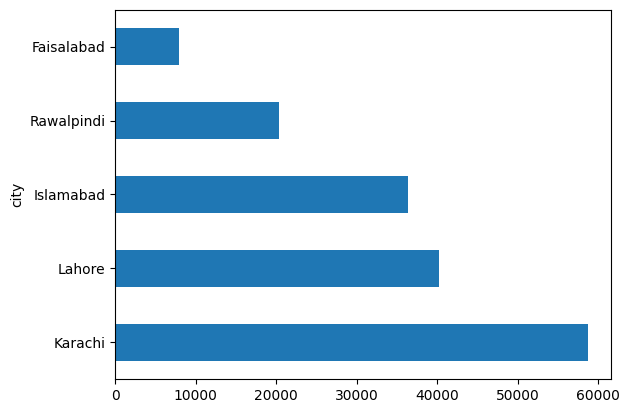

In [292]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['city'].value_counts().plot.barh();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


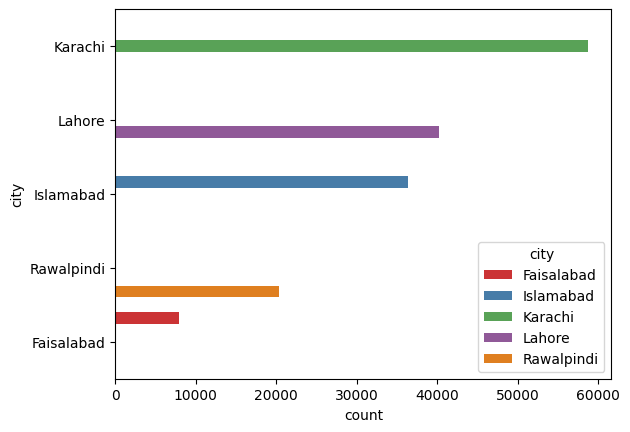

In [293]:
sns.countplot(data = df,
              y = "city",
              hue = "city",
              order = df["city"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


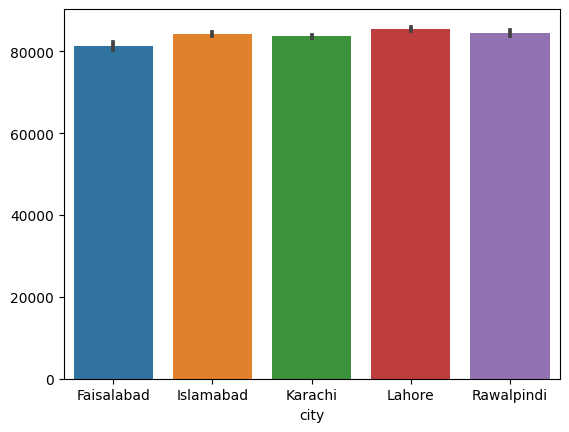

In [294]:
sns.barplot(data = df_fillna, x = "city", y = df.city.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


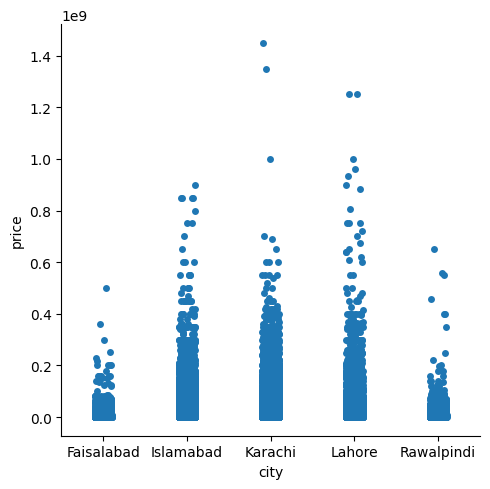

In [295]:
sns.catplot(data = df,
            x = "city",
            y = "price");

In [296]:
df.groupby(by = ['city', 'purpose'])['price'].mean().to_frame().reset_index().sort_values(by = "price", ascending = False)[:5]

/tmp/ipykernel_31/528345976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = ['city', 'purpose'])['price'].mean().to_frame().reset_index().sort_values(by = "price", ascending = False)[:5]


,city,purpose,price
3,Islamabad,For Sale,3.087495e+07
5,Karachi,For Sale,2.579079e+07
7,Lahore,For Sale,2.519948e+07
9,Rawalpindi,For Sale,1.499784e+07
1,Faisalabad,For Sale,1.437428e+07


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


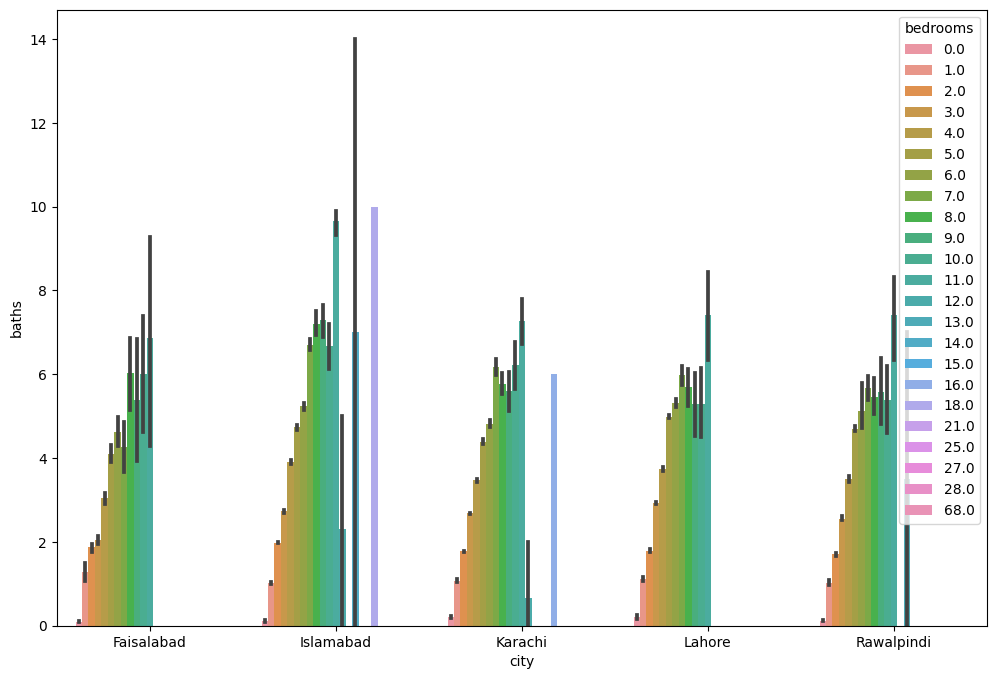

In [297]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_fillna, x = "city", y = 'baths', hue = "bedrooms");


## 5. Aykırı Değer Analizi (Outliers)


In [298]:
df = df_.copy()

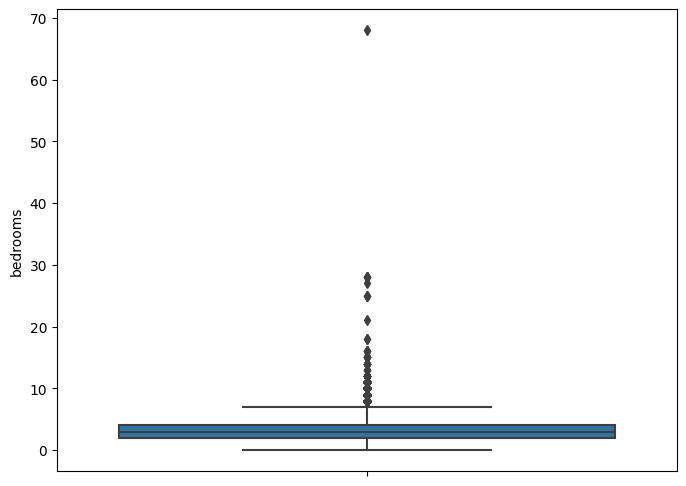

In [299]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["bedrooms"],
            orient = "v");

In [300]:
# Quantile değerlerin belirlenmesi.
Q1 = df["bedrooms"].quantile(0.25)
Q3 = df["bedrooms"].quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


2.0
4.0
2.0


In [301]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df["bedrooms"][df["bedrooms"] > upper_fence].index

outlier_idx

Index([     5,      6,     31,     42,     50,     79,     85,     99,    125,
          139,
       ...
       168147, 168297, 168301, 168318, 168324, 168331, 168338, 168339, 168341,
       168344],
      dtype='int64', length=3319)

### 5.1 Aykırı Gözlemlerin Silinmesi

In [302]:
df_del = df[~(df["bedrooms"] > upper_fence)]

df_del

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


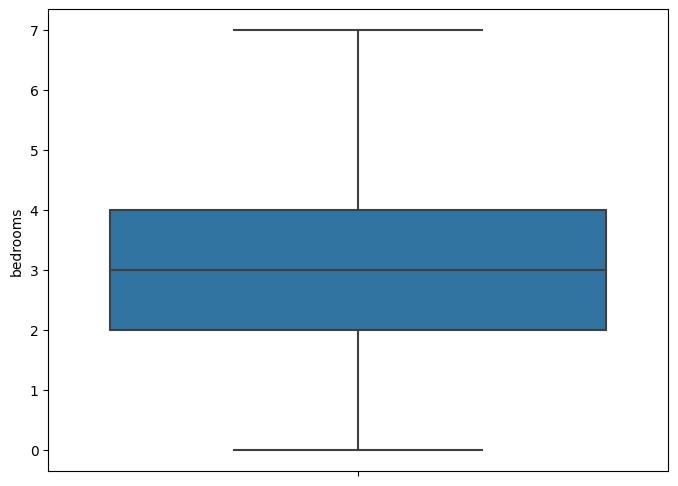

In [303]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["bedrooms"],
            orient = "v");

### 5.2 Aykırı Gözlemlerin Doldurulması

#### 5.2.1 Ortalama Değer İle Doldurma

In [304]:
df.loc[df["bedrooms"] > upper_fence, "bedrooms"] = df["bedrooms"].mean()

/tmp/ipykernel_31/1211010780.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.179422485544329' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["bedrooms"] > upper_fence, "bedrooms"] = df["bedrooms"].mean()


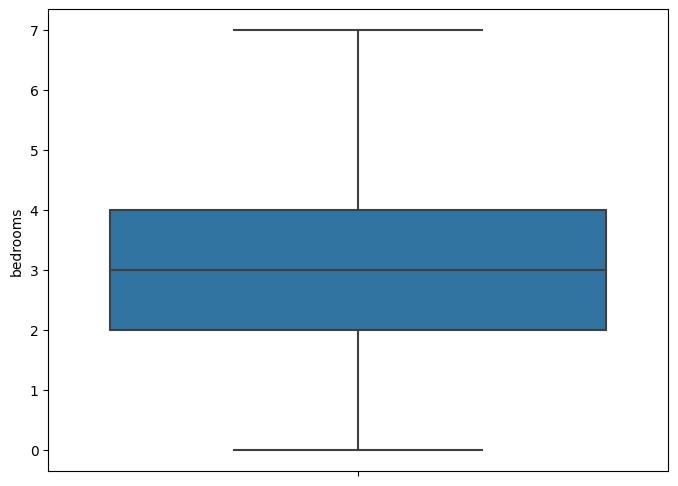

In [305]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["bedrooms"],
            orient = "v");

## 6. Veri Görselleştirme

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


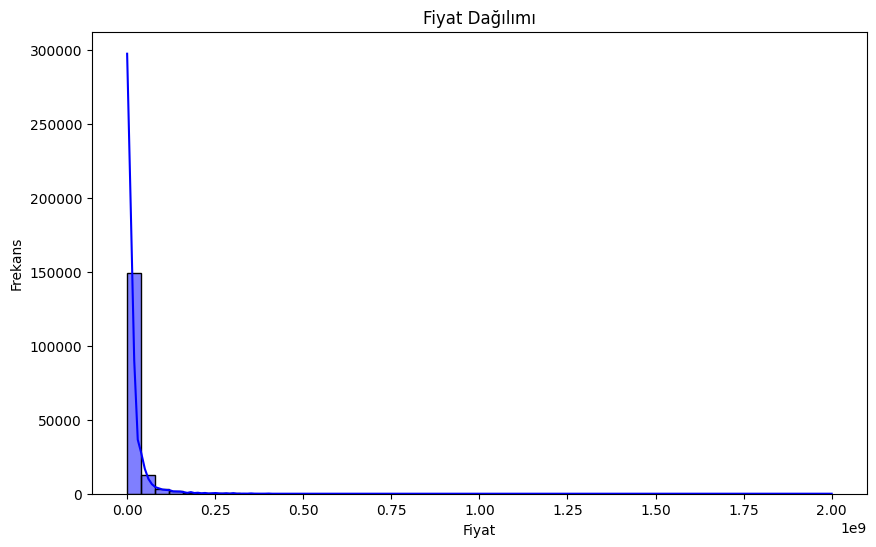

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

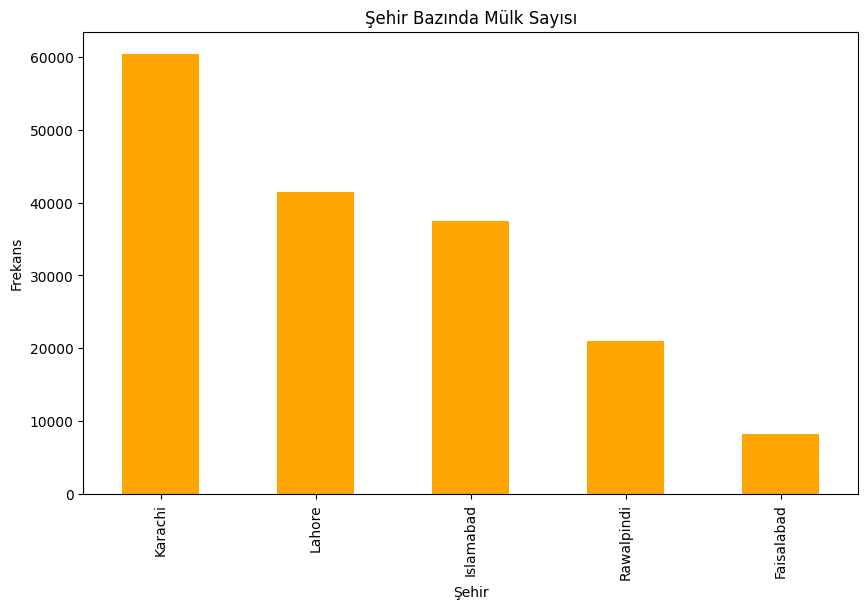

In [307]:
plt.figure(figsize=(10, 6))
df['city'].value_counts().plot(kind='bar', color='orange')
plt.title('Şehir Bazında Mülk Sayısı')
plt.xlabel('Şehir')
plt.ylabel('Frekans')
plt.show()

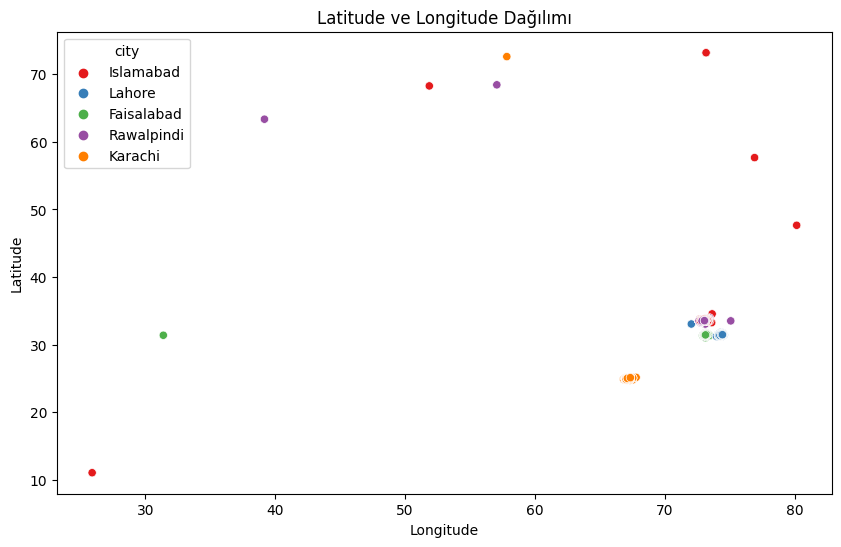

In [308]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='city', data=df, palette='Set1')
plt.title('Latitude ve Longitude Dağılımı')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()